In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# visualiation tools
import seaborn as sns
import matplotlib.pyplot as plt #for plotting maps and graphs
plt.style.use('ggplot')
# sci-kit learn tools
from scipy.stats import skew

In [4]:
df=pd.read_csv('car.data')

In [5]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
df.shape

(1727, 7)

In [7]:
col_names = ['sale','maintainance','doors','seats','boot_space','safety','class_variables']
df2 = pd.read_csv('car.data',names=col_names) #changing columns names to required strings.

In [8]:
df2.head()

,sale,maintainance,doors,seats,boot_space,safety,class_variables
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
df2.describe()

,sale,maintainance,doors,seats,boot_space,safety,class_variables
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,5more,more,big,low,unacc
freq,432,432,432,576,576,576,1210


In [10]:
#checking for empty cells
df2.isna().sum()

sale               0
maintainance       0
doors              0
seats              0
boot_space         0
safety             0
class_variables    0
dtype: int64

C:\Users\lucky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class_variables', ylabel='count'>

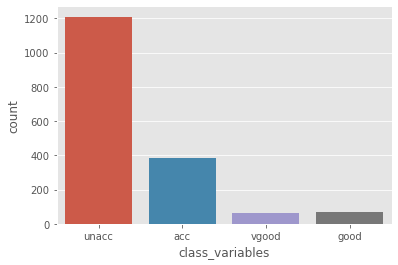

In [11]:
sns.countplot(df2['class_variables'])

In [12]:
df2.dtypes

sale               object
maintainance       object
doors              object
seats              object
boot_space         object
safety             object
class_variables    object
dtype: object

In [13]:
df3 = df2

In [14]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in df3.columns:
    df3[i]=lb.fit_transform(df3[i])

In [15]:
df2.head()

,sale,maintainance,doors,seats,boot_space,safety,class_variables
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [16]:
df3.head()

,sale,maintainance,doors,seats,boot_space,safety,class_variables
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [17]:
df3.describe()

,sale,maintainance,doors,seats,boot_space,safety,class_variables
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [18]:
Xfeatures = df3[['sale','maintainance','doors','seats','boot_space','safety']]
ylabels = df3["class_variables"]

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(Xfeatures, ylabels, test_size=0.30,random_state=7)

In [29]:
X_train

,sale,maintainance,doors,seats,boot_space,safety
1272,2,1,3,0,1,1
240,3,2,0,2,0,1
740,0,2,3,1,2,0
1368,1,3,2,2,2,1
187,3,0,2,2,0,2
...,...,...,...,...,...,...
1603,1,2,3,1,2,2
502,0,3,2,1,0,2
537,0,3,3,2,0,1
1220,2,1,1,0,1,0


In [30]:
X_test

,sale,maintainance,doors,seats,boot_space,safety
704,0,2,2,0,2,0
127,3,0,0,2,2,2
603,0,0,2,1,2,1
621,0,0,3,0,2,1
948,2,3,3,0,1,1
...,...,...,...,...,...,...
1083,2,2,0,0,1,1
517,0,3,3,0,1,2
1389,1,3,3,1,1,1
1067,2,0,3,1,1,0


In [23]:
logit = LogisticRegression()
logit.fit(X_train, Y_train)

LogisticRegression()

In [33]:
print("Accuracy Score:", accuracy_score(Y_test, logit.predict(X_test)))

Accuracy Score: 0.7129094412331407


In [34]:
logit.predict(X_test)

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 0, 3, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [35]:
logit.predict([[3,3,0,0,2,0]])

array([2])